#### Imports

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
from weakness_for_refinement import Weakness

#### Constants

In [3]:
TOTAL_AMBA_SPECS = 9
TOTAL_SYNTECH15_UNREAL_SPECS = 14
TOTAL_SYNTECH15_1UNREAL_SPECS = 130

#### Utils

0-1s          47
Unrepaired    30
1-10s         12
10-100s        2
>100s          1
Name: Runtime Category, dtype: int64


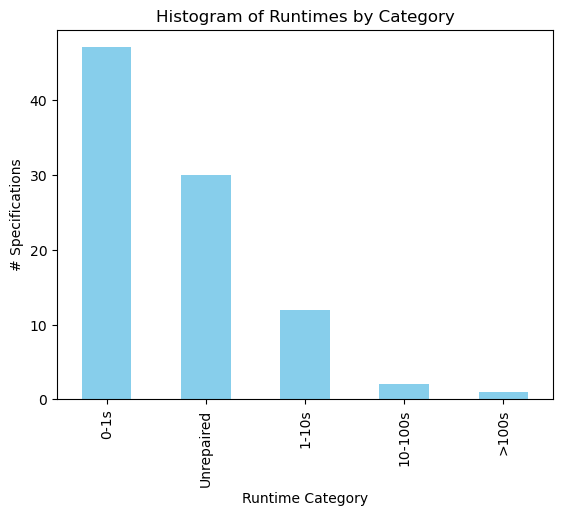

In [52]:
df = pd.read_csv('outputs-interpolation/INTERPOLATION-MIN-INF/average.csv')

bins = [0, 1, 10, 100, float('inf')]
labels = ['0-1s', '1-10s', '10-100s', '>100s']

df['Runtime Category'] = pd.cut(df['TimeToFirst'], bins=bins, labels=labels, right=False).values.add_categories('Unrepaired')
df['Runtime Category'].fillna('Unrepaired', inplace=True)

histogram_data = df['Runtime Category'].value_counts()
print(histogram_data)

# Create a histogram
histogram_data.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Runtime Category')
plt.ylabel('# Specifications')
plt.title('Histogram of Runtimes by Category')

# Show the plot
plt.show()